以下のデータを取得して、`data`ディレクトリに配置。

__COVID-19 World Vaccination Progress__  
URL:  
・https://www.kaggle.com/gpreda/covid-world-vaccination-progress    
DATA:  
・country_vaccinations.csv  
・country_vaccinations_by_manufacturer.csv

---

__Annotated geo-json geometry files for the world__  
URL:  
・https://github.com/johan/world.geo.json  
DATA:  
・countries.geo.json

In [1]:
%matplotlib inline

import folium
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1. データの概要を掴む
とにかく大雑把にデータの特徴を把握しよう。

国別ワクチン接種状況のデータをロード。

In [2]:
country_vaccinations_df = pd.read_csv('data/country_vaccinations.csv')

len(country_vaccinations_df)

66330

データの中身を確認。  
不明な属性があれば、データ取得元で確認する。

In [3]:
country_vaccinations_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


１行目のみを表示してみる。  
以下はどんな属性であるか？  
- people_fully_vaccinated
- daily_vaccinations_raw
- daily_vaccinations
- people_vaccinated_per_hundred

In [4]:
country_vaccinations_df.iloc[0]

country                                                                      Afghanistan
iso_code                                                                             AFG
date                                                                          2021-02-22
total_vaccinations                                                                   0.0
people_vaccinated                                                                    0.0
people_fully_vaccinated                                                              NaN
daily_vaccinations_raw                                                               NaN
daily_vaccinations                                                                   NaN
total_vaccinations_per_hundred                                                       0.0
people_vaccinated_per_hundred                                                        0.0
people_fully_vaccinated_per_hundred                                                  NaN
daily_vaccinations_pe

`source_name`、`source_website`列は今回必要ないので削除。

In [5]:
country_vaccinations_df.drop(columns={'source_name', 'source_website'}, inplace=True)

数値属性の集計情報を確認。  
何か特徴が読み取れるか？

In [6]:
country_vaccinations_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.487200e+04,3.338700e+04,3.077400e+04,2.840500e+04,6.596400e+04,34872.000000,33387.000000,30774.000000,65964.000000
mean,3.357830e+07,1.342228e+07,9.778293e+06,2.772051e+05,1.364650e+05,62.694791,34.968768,28.674557,3495.352996
std,1.730459e+08,5.276935e+07,3.831746e+07,1.273848e+06,8.208942e+05,56.275645,27.648268,26.033862,4160.725120
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.925522e+05,2.778055e+05,1.656195e+05,5.371000e+03,1.005000e+03,10.210000,7.720000,4.202500,679.000000
50%,2.563082e+06,1.639806e+06,1.140760e+06,2.631000e+04,7.712000e+03,48.125000,31.580000,21.490000,2280.500000
75%,1.207973e+07,6.512414e+06,5.444750e+06,1.272430e+05,4.436100e+04,108.822500,60.290000,51.717500,5080.000000
max,2.769530e+09,1.225000e+09,1.193466e+09,2.474100e+07,2.242429e+07,321.000000,122.180000,118.860000,117497.000000


ヒストグラムで表示。  
何か特徴が読み取れるか？  
※「1e9」は10の9乗の意味。

array([[<AxesSubplot:title={'center':'total_vaccinations'}>,
        <AxesSubplot:title={'center':'people_vaccinated'}>,
        <AxesSubplot:title={'center':'people_fully_vaccinated'}>],
       [<AxesSubplot:title={'center':'daily_vaccinations_raw'}>,
        <AxesSubplot:title={'center':'daily_vaccinations'}>,
        <AxesSubplot:title={'center':'total_vaccinations_per_hundred'}>],
       [<AxesSubplot:title={'center':'people_vaccinated_per_hundred'}>,
        <AxesSubplot:title={'center':'people_fully_vaccinated_per_hundred'}>,
        <AxesSubplot:title={'center':'daily_vaccinations_per_million'}>]],
      dtype=object)

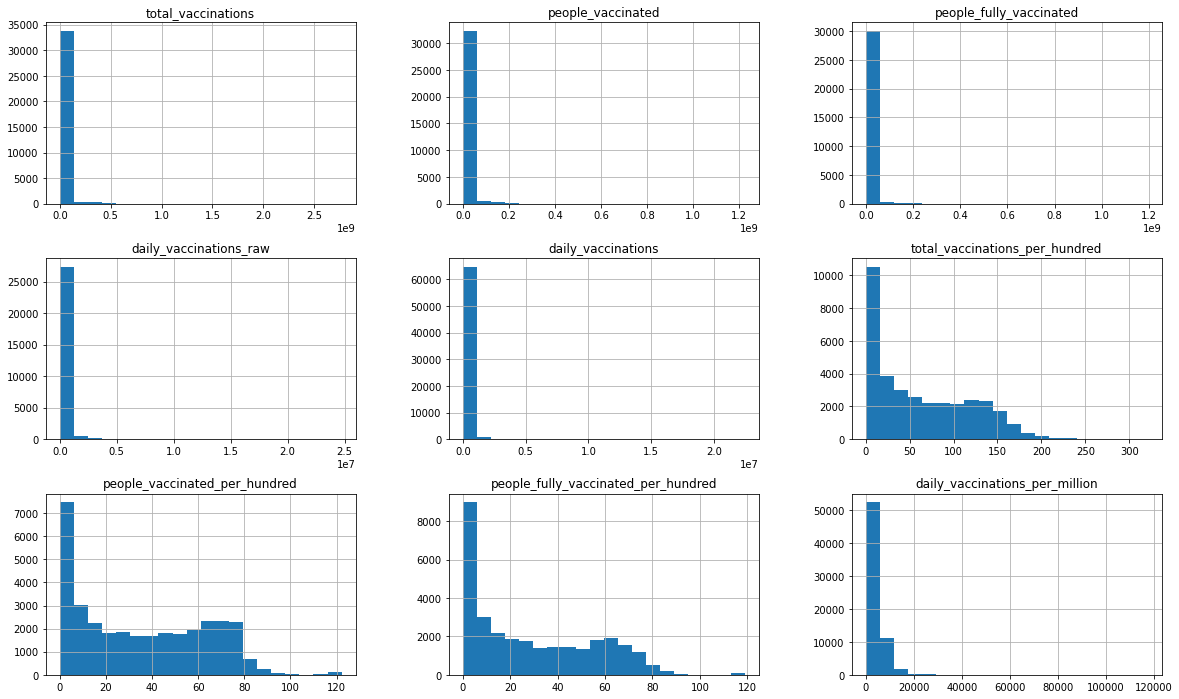

In [7]:
country_vaccinations_df.hist(bins=20, figsize=(20, 12))

`daily_vaccinations_raw`と`daily_vaccinations`のグラフの違いが気になる。  
おそらく欠損値がかなりあるのではないか？

そこで列ごとの欠損値の比率を確認してみる。  
比率は`pandas.DataFrame.isna()`で出力されたブール値を列ごとに合計し、データ総数で割って計算。

In [8]:
(country_vaccinations_df.isna().sum() / len(country_vaccinations_df)).round(2)

country                                0.00
iso_code                               0.00
date                                   0.00
total_vaccinations                     0.47
people_vaccinated                      0.50
people_fully_vaccinated                0.54
daily_vaccinations_raw                 0.57
daily_vaccinations                     0.01
total_vaccinations_per_hundred         0.47
people_vaccinated_per_hundred          0.50
people_fully_vaccinated_per_hundred    0.54
daily_vaccinations_per_million         0.01
vaccines                               0.00
dtype: float64

### 2. 地図を使ってデータを把握する
各国をワクチン２回接種の割合で色分けしてみる。

各国ごとの最新のワクチン２回接種割合のデータフレームを作成。

In [9]:
country_fully_vaccinated_df = country_vaccinations_df.groupby(['country', 'iso_code'])\
                                .max()['people_fully_vaccinated_per_hundred'].reset_index()

country_fully_vaccinated_df.head(20)

,country,iso_code,people_fully_vaccinated_per_hundred
0,Afghanistan,AFG,8.95
1,Albania,ALB,35.45
2,Algeria,DZA,12.45
3,Andorra,AND,65.35
4,Angola,AGO,11.03
5,Anguilla,AIA,60.98
6,Antigua and Barbuda,ATG,59.26
7,Argentina,ARG,70.45
8,Armenia,ARM,21.66
9,Aruba,ABW,73.52


棒グラフで分布を確認。  
`seaborn.barplot()`でグラフを描画。

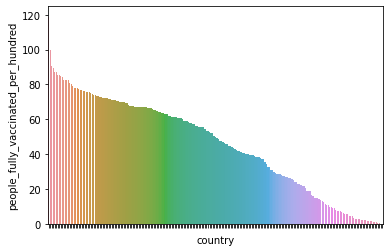

In [22]:
country_fully_vaccinated_from_top_df = \
    country_fully_vaccinated_df.sort_values('people_fully_vaccinated_per_hundred', ascending=False)
ax = sns.barplot(
    x=country_fully_vaccinated_from_top_df['country'],
    y=country_fully_vaccinated_from_top_df['people_fully_vaccinated_per_hundred'])

# x軸目盛り値のラベルを表示しない。
# セミコロンでテキスト出力を防ぐ。
ax.set(xticklabels=[]);

地図を表示。  
地図上のデータからどんなことが読み取れるか？

`folium.Choropleth()`でコロプレスマップを描画。   
国ごとの区画情報は`countries.geo.json`を利用します。

参考： [foliumを使って東京23区ラーメンスコアを可視化する](https://qiita.com/xkent/items/d068fc504c8cef217ca8)

In [12]:
map = folium.Map(location=[0,0], zoom_start=2.4)

folium.Choropleth(
    # geo_data=json.load(open('data/countries.geo.json', 'r')),
    geo_data='data/countries.geo.json',
    data=country_fully_vaccinated_df,
    fill_opacity=1,
    line_color='black',
    nan_fill_color='#888888',
    columns=['iso_code', 'people_fully_vaccinated_per_hundred'],
    key_on= "feature.id",
    fill_color='RdBu').add_to(map)

map

### 3. 少しだけ掘り下げた分析をしてみる
各製造メーカー製ワクチンの接種状況がどのように推移しているかを分析。

製造メーカー別のワクチン接種データをロード。

In [13]:
country_vaccinations_by_manufacturer_df = pd.read_csv('data/country_vaccinations_by_manufacturer.csv')

len(country_vaccinations_by_manufacturer_df)

25387

データの中身を確認。

In [14]:
country_vaccinations_by_manufacturer_df.head(20)

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31424
4,Austria,2021-01-15,Johnson&Johnson,0
5,Austria,2021-01-15,Moderna,93
6,Austria,2021-01-15,Oxford/AstraZeneca,0
7,Austria,2021-01-15,Pfizer/BioNTech,116650
8,Austria,2021-01-22,Johnson&Johnson,0
9,Austria,2021-01-22,Moderna,324


欠損値があるか確認。

In [15]:
country_vaccinations_by_manufacturer_df.isna().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

グラフのX軸目盛用に`month`列を追加。

In [16]:
country_vaccinations_by_manufacturer_df['month'] = pd.to_datetime(
    country_vaccinations_by_manufacturer_df.date, format='%Y-%m-%d').dt.strftime('%Y-%m')

ワクチン、月別に接種回数を合計したデータフレームを生成。

In [17]:
vaccinations_by_manufacturer_df = country_vaccinations_by_manufacturer_df \
                                    .groupby(['vaccine', 'month']) \
                                    .agg({'total_vaccinations': 'sum'}) \
                                    .reset_index()

vaccinations_by_manufacturer_df.head()                                   

,vaccine,month,total_vaccinations
0,CanSino,2021-05,74
1,CanSino,2021-06,6478429
2,CanSino,2021-07,15025763
3,CanSino,2021-08,17238106
4,CanSino,2021-09,26197667


折れ線グラフを表示。  
グラフからどんなことが言えるか？

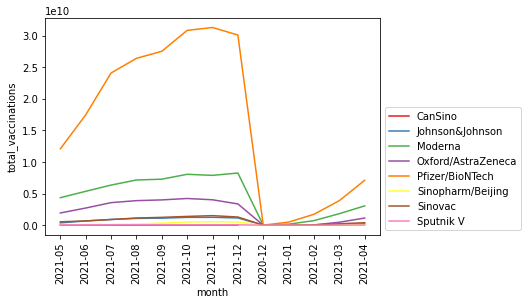

In [18]:
ax = sns.lineplot(
    data=vaccinations_by_manufacturer_df,
    x='month',
    y='total_vaccinations',
    hue='vaccine',
    palette='Set1')
plt.xticks(rotation=90)
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

### 4. 独自の分析目標を定義して分析してみよう

〇〇〇〇〇〇〇〇〇〇を分析。